In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
def wrangle(filepath):
  df=pd.read_csv(filepath)

  #drop unimportant features:



  return df

In [ ]:
df = wrangle("Housing.csv")


In [ ]:
df.head()

,price,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,2,3,yes,no,no,no,yes,2,yes
1,12250000,8960,4,4,yes,no,no,no,yes,3,no
2,12250000,9960,2,2,yes,no,yes,no,no,2,yes
3,12215000,7500,2,2,yes,no,yes,no,yes,3,yes
4,11410000,7420,1,2,yes,yes,yes,no,yes,2,no


In [ ]:
df.select_dtypes("number").describe()

,price,area,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00
mean,"4,766,729.25","5,150.54",1.29,1.81,0.69
std,"1,870,439.62","2,170.14",0.50,0.87,0.86
min,"1,750,000.00","1,650.00",1.00,1.00,0.00
25%,"3,430,000.00","3,600.00",1.00,1.00,0.00
50%,"4,340,000.00","4,600.00",1.00,2.00,0.00
75%,"5,740,000.00","6,360.00",2.00,2.00,1.00
max,"13,300,000.00","16,200.00",4.00,4.00,3.00


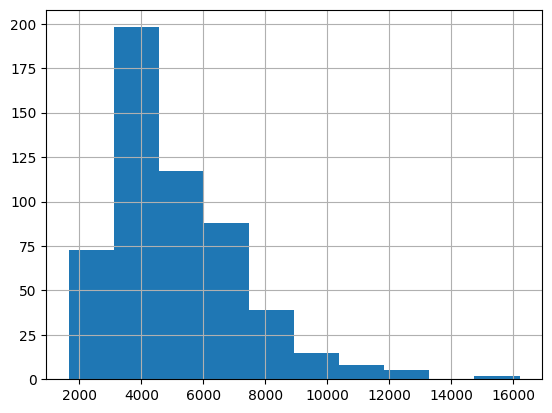

In [ ]:
df["area"].hist();

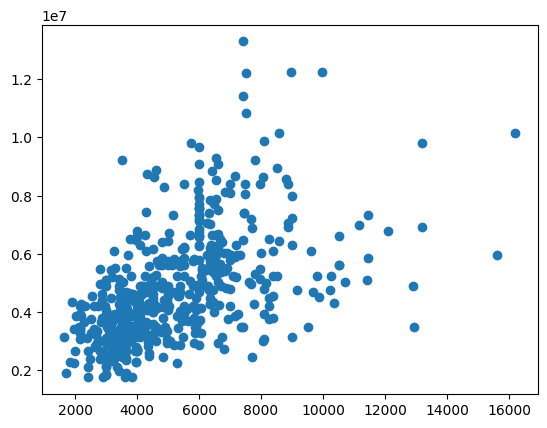

In [ ]:
plt.scatter(x=df["area"],y=df["price"]);

In [ ]:
c=df.select_dtypes("number").corr()

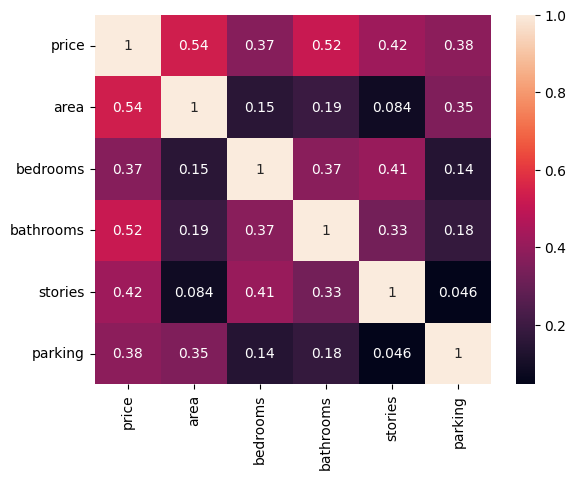

In [ ]:
sns.heatmap(c,annot=True);

In [ ]:
l=df.select_dtypes("object").columns
for i in l:
  df[i]=df[i].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


In [ ]:
X = df.drop("price",axis=1)
y = df["price"]

In [ ]:
cat = X.select_dtypes("object").columns
num = X.select_dtypes("number").columns

In [ ]:
categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num),  # Scale numerical columns
        ('cat', categorical_transformer, cat)  # Encode categorical columns
    ]
)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model = make_pipeline(
    preprocessor,  # Preprocessing step
    LinearRegression() # Model step
)

model.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

In [ ]:
y_mean = df["price"].mean()
y_base = [y_mean] * len(y_train)
mse_base = mean_absolute_error(y_train,y_base)
round(mse_base,2)

1363245.29

In [ ]:
y_pred = model.predict(X_test)
mse_pred = mean_absolute_error(y_test,y_pred)
round(mse_pred,2)

970043.4

In [ ]:
R2 = r2_score(y_test,y_pred)
round(R2,3)

0.653

In [ ]:
encoder = model.named_steps['columntransformer'].transformers_[1][1]
features = encoder.get_feature_names_out(input_features=cat)
importances= model.named_steps["linearregression"].coef_


In [ ]:
all_features = np.concatenate([num, features])

In [ ]:
len(importances)

20

In [ ]:
len(all_features)

20

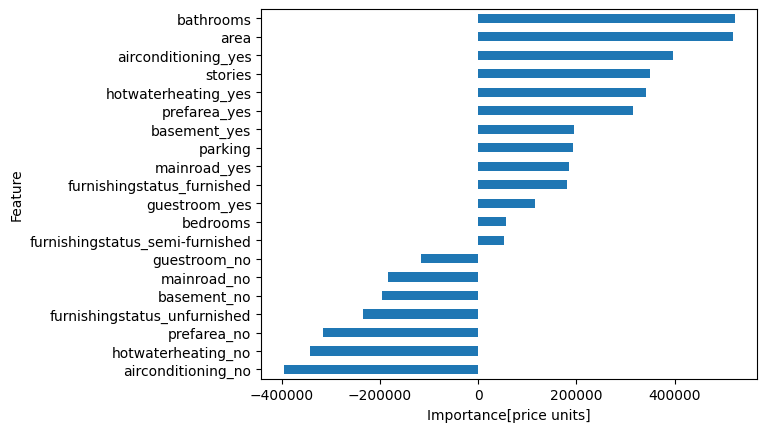

In [ ]:
feat_imp = pd.Series(importances,index=all_features)
feat_imp.sort_values().plot(kind="barh");
plt.xlabel("Importance[price units]");
plt.ylabel("Feature");